# [E-1]Rock-Scissor-Paper Classification

## 순서 : 데이터 준비 $\rightarrow$ 딥러닝 네트워크 설계 $\rightarrow$ 딥러닝 네트워크 학습 $\rightarrow$ 테스트 및 성능개선

### 1. 데이터 준비

#### (1) 데이터 만들기 : 사진 찍기 $\rightarrow$ PIL 라이브러리 이용 $\rightarrow$ 각 디렉토리별 이미지 불러와서 사이즈 조정

- 사진 찍기 : 가위, 바위, 보 사진 각각 100장씩 찍기 (참조: https://teachablemachine.withgoogle.com/ 이곳을 이용하면 편리)

- "좋은 데이터가 좋은 결과를 낫는다!!" (다양한 각도와 크기로 촬영하기)

- 디렉토리 생성 및 사진 분류 저장 : rock_scissor_paper 디렉토리의 하위 디렉토리로 각각 /rock, /scissor, /paper 디렉토리 생성

- mkdir -p : mkdir 를 이용하여 하위 디렉토리 생성 시 중간 디렉토리가 필요한데(그래야 오류 x), 이를 한번에 처리할 수 있는 옵션이 바로 '-p'!!  
  
    `mkdir -p ~/aiffel/rock_scissor_paper/scissor`  
    `mkdir -p ~/aiffel/rock_scissor_paper/rock`  
    `mkdir -p ~/aiffel/rock_scissor_paper/paper`  
    `ls -l ~/aiffel/rock_scissor_paper`

- 데이터 불러오기 및 크기 재조정(resize) : 다운로드 받은 원본 $224\times 224 \rightarrow 28\times 28$로 재조정

- PIL 라이브러리 불러오기 (if 없으면 패키지 설치)

In [1]:
# PIL 라이브러리 설치 및 불러오기
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


- '가위' 이미지 불러오기 및 사이즈 조정 ($224\times 224 \rightarrow 28\times 28$)

In [2]:
import os
# 가위 디렉토리의 모든 jpg 파일 읽어오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 가위 디렉토리의 모든 파일을 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


- '바위' 이미지 불러오기 및 사이즈 조정 ($224\times 224 \rightarrow 28\times 28$)

In [3]:
import os
# 바위 디렉토리의 모든 jpg 파일을 읽어오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 바위 디렉토리의 모든 파일을 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


- '보' 이미지 불러오기 및 사이즈 조정 ($224\times 224 \rightarrow 28\times 28$)

In [4]:
import os
# 보 디렉토리의 모든 jpg 파일을 읽어오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 보 디렉토리의 모든 파일을 28x28 사이즈로 바꾸어 저장
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


#### (2) 데이터셋 불러오기 : load_data() 함수 이용, 학습데이터 테스트데이터 불러오기

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
# x_train, y_train 데이터

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=12300   # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2)데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 12300 입니다.
x_train shape: (12300, 28, 28, 3)
y_train shape: (12300,)


In [7]:
# x_test, y_test 데이터
def load_data(ima_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 # 가위바위보 이미지 개수 총합에 주의
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(ima_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(ima_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(ima_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_dir = os.getenv("HOME") + "/aiffel/test_rock_scissor_paper"
(x_test, y_test)=load_data(test_dir)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 2. 딥러닝 네트워크 설계

#### (1) tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크 설계 : 가위바위보 분류기

In [8]:
# tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크 설계 : 가위바위보 분류기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

# 위에서 설계한 딥러닝 네트워크 모델 확인
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

#### (2) 네트워크 입력형태 확인

In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 네트워크 입력 형태 = (데이터 개수, x-이미지 크기, y-이미지 크기, 채널수), 데이터수에 -1 입력 시 reshape 자동계산, 주의!: RGB 채널수=3
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (12300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (12300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


### 3. 딥러닝 네트워크 학습

In [10]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
385/385 [==============================] - 4s 10ms/step - loss: 0.8724 - accuracy: 0.5843
Epoch 2/20
385/385 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.8016
Epoch 3/20
385/385 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8833
Epoch 4/20
385/385 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9232
Epoch 5/20
385/385 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.9493
Epoch 6/20
385/385 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9650
Epoch 7/20
385/385 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9692
Epoch 8/20
385/385 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9836
Epoch 9/20
385/385 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9884
Epoch 10/20
385/385 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.988

### 4. 테스트 및 성능 개선

#### (1) 테스트

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0754 - accuracy: 0.9800
test_loss: 0.07536916434764862 
test_accuracy: 0.9800000190734863


#### (2) 예측

model.predict() 결과 :  [9.9963880e-01 5.9633796e-05 3.0166013e-04]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


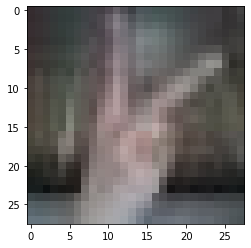

예측확률분포: [0.46180144 0.53553534 0.00266323]
라벨: 0, 예측결과: 1


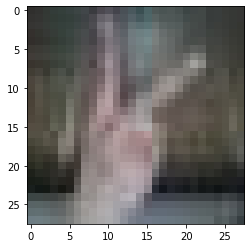

예측확률분포: [0.46180144 0.53553534 0.00266323]
라벨: 0, 예측결과: 1


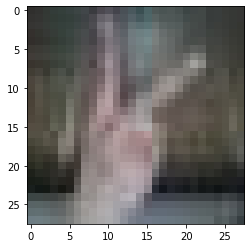

예측확률분포: [0.46180144 0.53553534 0.00266323]
라벨: 0, 예측결과: 1


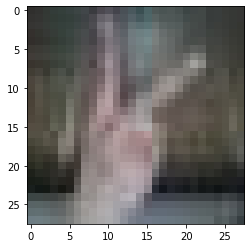

예측확률분포: [0.46180144 0.53553534 0.00266323]
라벨: 0, 예측결과: 1


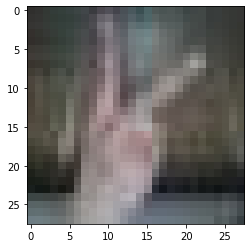

예측확률분포: [0.46180144 0.53553534 0.00266323]
라벨: 0, 예측결과: 1


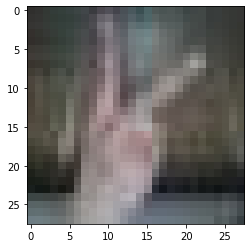

In [32]:
import matplotlib.pyplot as plt

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 위 예측대로 가장 높은 확률을 받은 이미지를 출력하여 확인해 보기
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

# 예측이 틀린 경우의 확인 (추후 성능 개선에 사용)
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

#### (3) 성능 개선

In [12]:
n_channel_1=16*2
n_channel_2=32*2
n_channel_3 =64*2
n_dense=32*16
n_train_epochs=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', 
                              input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 128)        

In [13]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epochs)

Epoch 1/20
385/385 [==============================] - 6s 15ms/step - loss: 0.9475 - accuracy: 0.5351
Epoch 2/20
385/385 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8125
Epoch 3/20
385/385 [==============================] - 1s 1ms/step - loss: 0.2832 - accuracy: 0.9052
Epoch 4/20
385/385 [==============================] - 1s 1ms/step - loss: 0.1839 - accuracy: 0.9453
Epoch 5/20
385/385 [==============================] - 1s 1ms/step - loss: 0.1421 - accuracy: 0.9606
Epoch 6/20
385/385 [==============================] - 1s 1ms/step - loss: 0.0998 - accuracy: 0.9763
Epoch 7/20
385/385 [==============================] - 1s 1ms/step - loss: 0.0993 - accuracy: 0.9755
Epoch 8/20
385/385 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9844
Epoch 9/20
385/385 [==============================] - 1s 1ms/step - loss: 0.0666 - accuracy: 0.9849
Epoch 10/20
385/385 [==============================] - 1s 1ms/step - loss: 0.0595 - accuracy: 0.988

#### (4) 성능 확인

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0441 - accuracy: 0.9933
test_loss: 0.044149335473775864 
test_accuracy: 0.9933333396911621


### 5. Review

이미지 분류기에 해당하는 "가위바위보 분류기"는 "데이터 준비 $\rightarrow$ 네트워크 설계 $\rightarrow$ 네트워크 학습 $\rightarrow$ 네트워크 평가 및 성능 개선" 의 순서로 진행된다.  
  
분류기의 성능을 좌우하는 중요한 사항 중 하나는 데이터의 질이며 다양한 각도와 크기의 이미지 촬영이 요구된다.  
  
데이터는 학습데이터와 테스트데이터로 나뉘고, 그 비율은 학습데이터의 양을 충분히 크게 잡는 것이 분류기의 정확도를 높여준다.  
대체로 "학습데이터 : 테스트데이터 = 9 : 1 또는 8 : 2"의 비율로 안배하는 것으로 보여진다.  
테스트데이터는 성능평가에 대한 신뢰도를 높이기 위해 절대 학습데이터로 사용할 수 없으며, 테스트 후 예측과 성능개선을 통해 테스트의 정확도를 조정한다.  
  
본 보고서의 모델은 손글씨 분류기를 참고한 모델로써 `tf.keras`의 `Sequential API`를 이용한 `LeNet`이라는 딥러닝 네트워크 모델이며, 설계 테스트 결과와 성능 개선의 결과는 각각 아래와 같다.  
  
1. 테스트 결과  
10/10 - 0s - loss: 0.0754 - accuracy: 0.9800  
test_loss: 0.07536916434764862  
test_accuracy: 0.9800000190734863  
  
  
2. 성능개선 결과  
10/10 - 0s - loss: 0.0441 - accuracy: 0.9933  
test_loss: 0.044149335473775864  
test_accuracy: 0.9933333396911621  
    
본인은 학습데이터의 수를 충분히 늘리기 위해 데이터를 확보하다 보니 본의 아니게 "학습데이터 : 테스트데이터 = 41 : 1" 의 비율로 설정되어, 예상보다 모델의 성능이 좋게 나왔다고 생각되어진다.  
  
이와 같은 확률실험과 최적화를 통한 모델의 설계에 있어서 비교적 통제 가능한 랜덤변수들(예를 들면, 데이터의 확보 및 수량 조절, 하이퍼파라미터 변수들)에 대한 연구나 범위의 조정이 필요하지 않을까 생각한다.  
아직 이 분야에 대한 지식이 부족하여 위에 언급한 것이 가능한지는 모르겠으나, 가능하다 하더라도 굉장히 어려운 문제로 판단된다.